In [1]:
import numpy as np
import matplotlib.pyplot as plt
color_list_10=['tab:orange','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']


In [2]:
# read output data from 'GibbsToMaxwell.ipynb'
path='./'
dir_name='data/'
data_ZLA=np.loadtxt(path+dir_name+'ZLA.txt').transpose()
data_vMIT=np.loadtxt(path+dir_name+'vMIT.txt').transpose()

g_array=np.linspace(0,1,21)
data_MIX=[]
for g in g_array: 
    data_MIX.append(np.loadtxt(path+dir_name+'MIX_a20_B165_g%d.txt'%(int(100.01*g))).transpose())
data_MIX=np.array(data_MIX)

cs2ad_MIX=np.loadtxt(path+dir_name+'MIX_a20_B165_cs2ad.txt').transpose()[::-1]


Text(0, 0.5, '$p$ (MeV fm$^{-3}$)')

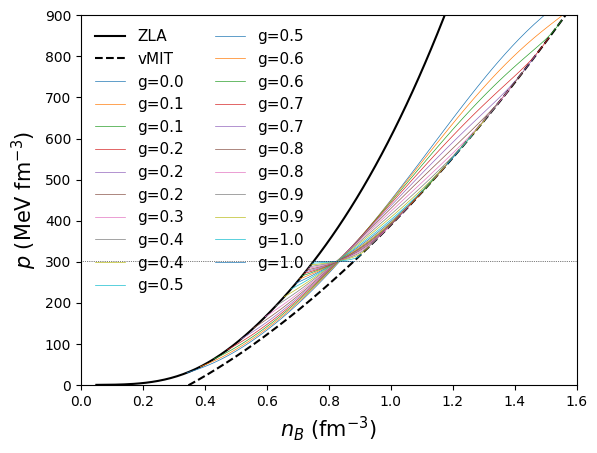

In [3]:
# plot EOS for hadronic matter, quark matter and mixed matter
plt.figure()
for i,data_i,label_i,ls in zip(range(2),[data_ZLA,data_vMIT],['ZLA','vMIT'],['-','--']):
    plt.plot(data_i[1],data_i[3]+data_i[9]+data_i[12],label=label_i,ls=ls,color='k')

for eos_array_i,g in zip(data_MIX[:,2:5],g_array):
    plt.plot(eos_array_i[0],eos_array_i[2],label='g=%.1f'%(g),lw=0.5)

plt.axhline(y=data_MIX[-1,4,0],ls=':',color='k',lw=0.5)
plt.xlim(0,1.6)
plt.ylim(0,900)

plt.legend(frameon=False,fontsize=11,ncols=2)

plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.ylabel('$p$ (MeV fm$^{-3}$)',fontsize=15)

#plt.savefig(path+fig_name+'EOS_Gibbs_to_Maxwell.pdf',bbox_inches = 'tight',format='pdf')

/var/folders/lb/w1dqk53d0656wnhbhpphtq500000gn/T/ipykernel_67930/606962882.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


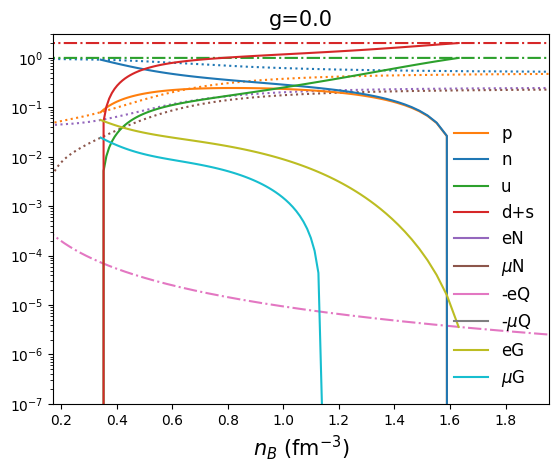

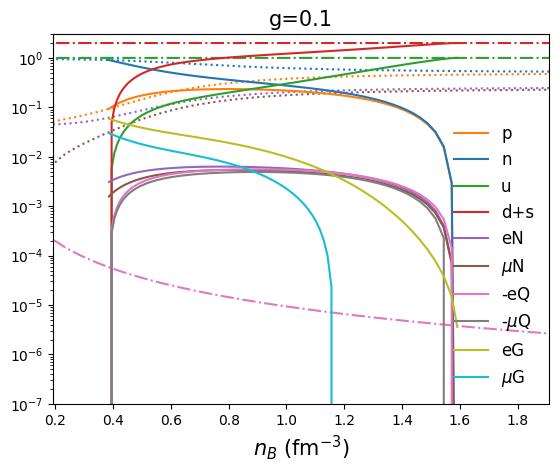

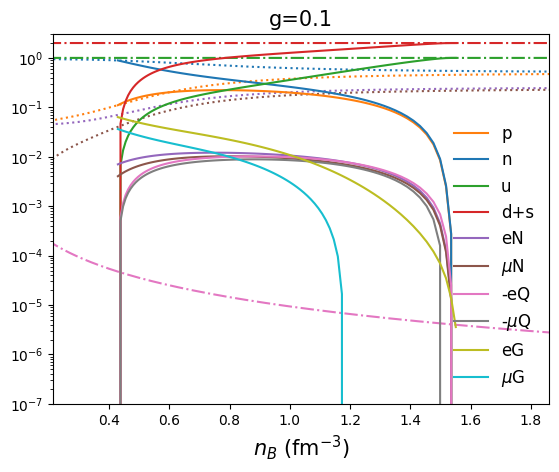

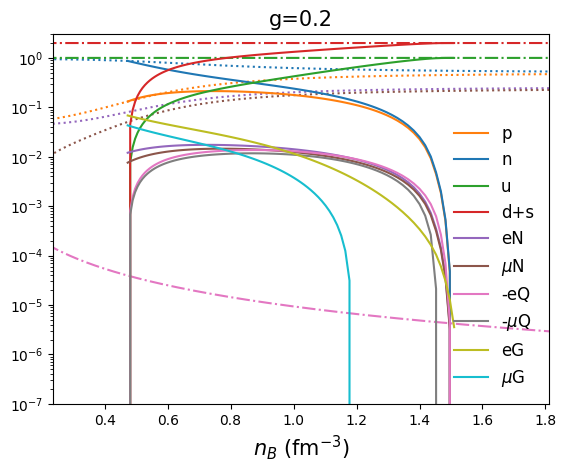

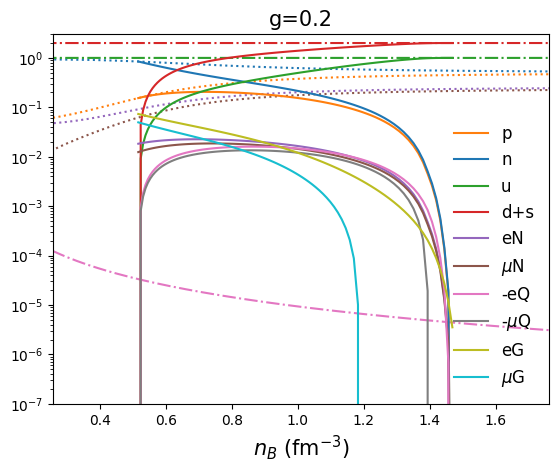

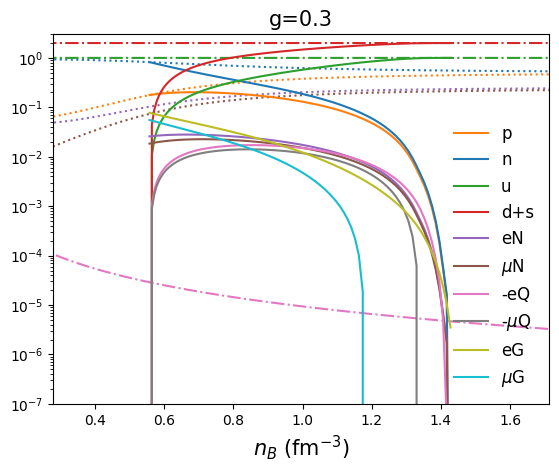

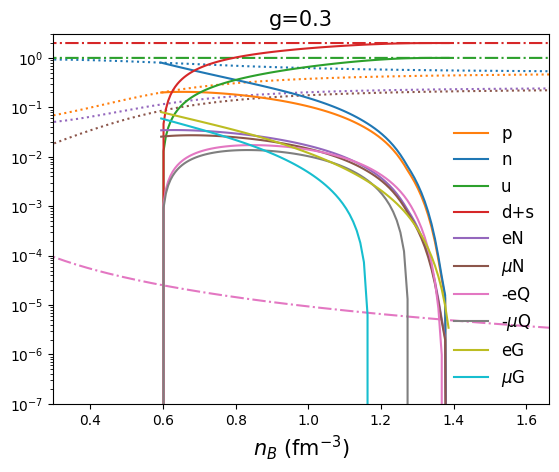

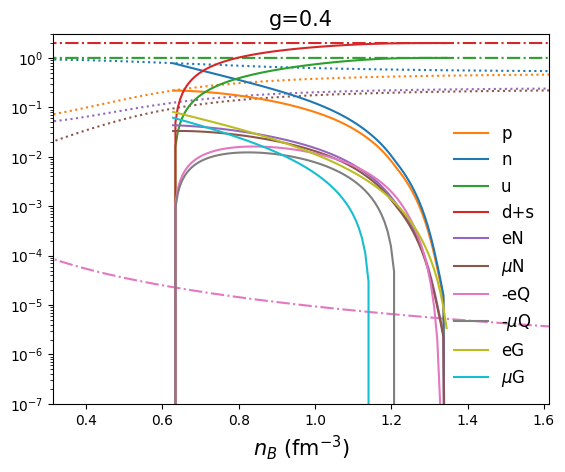

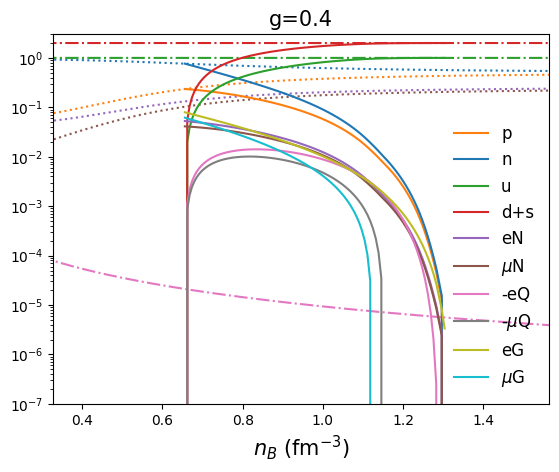

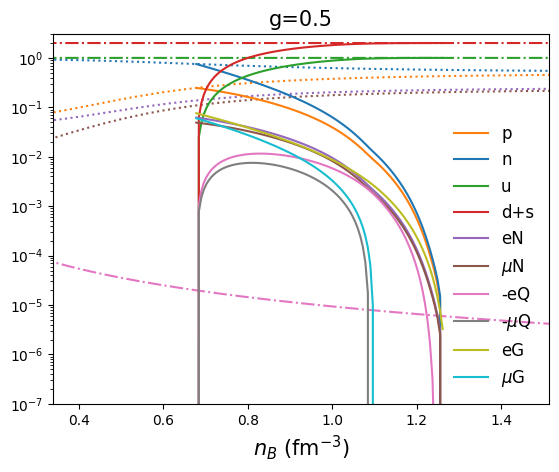

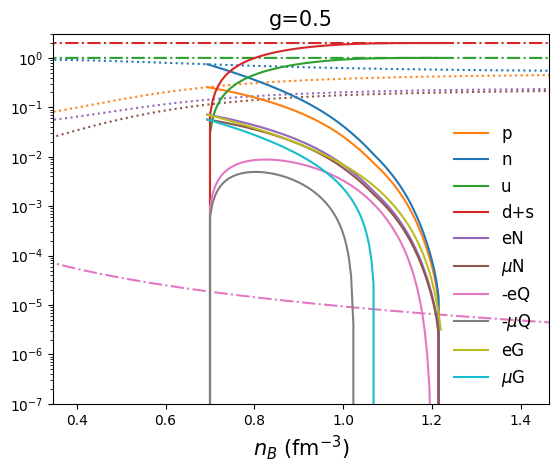

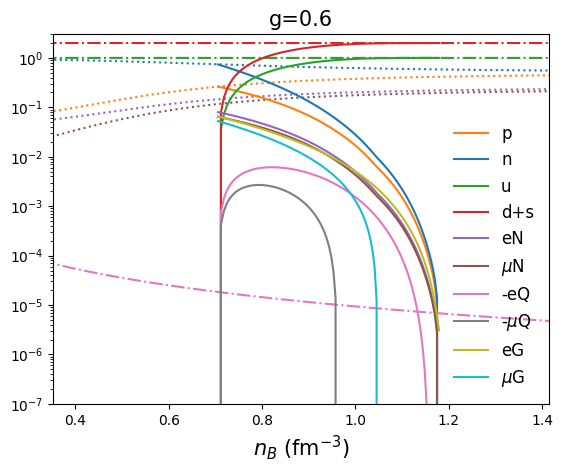

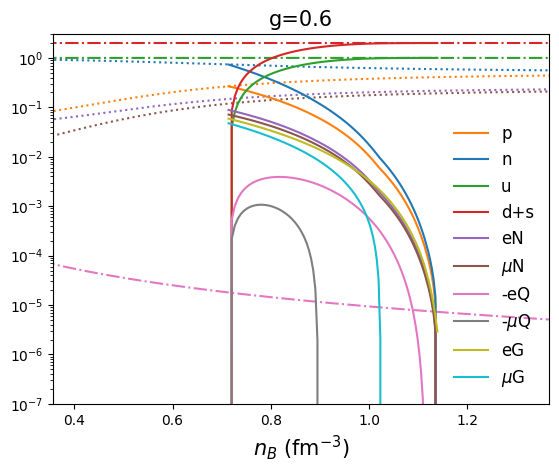

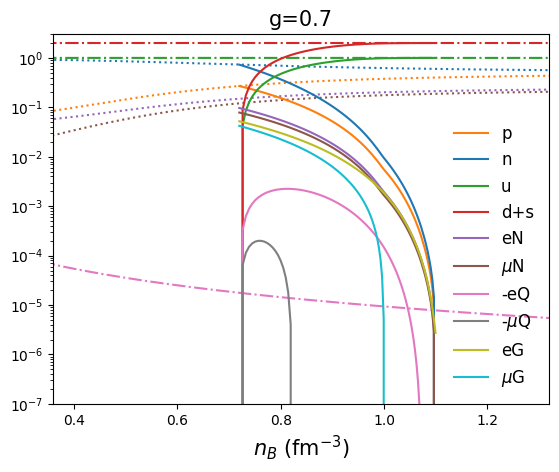

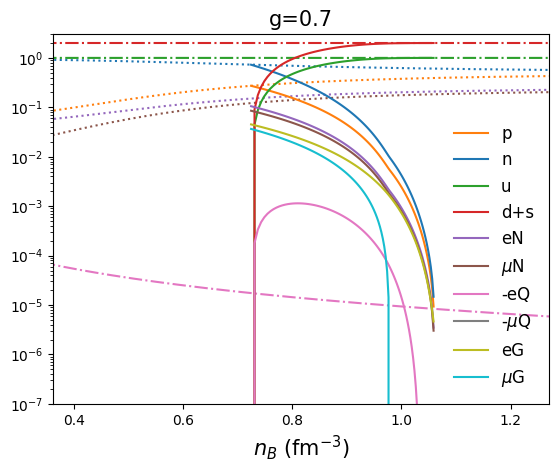

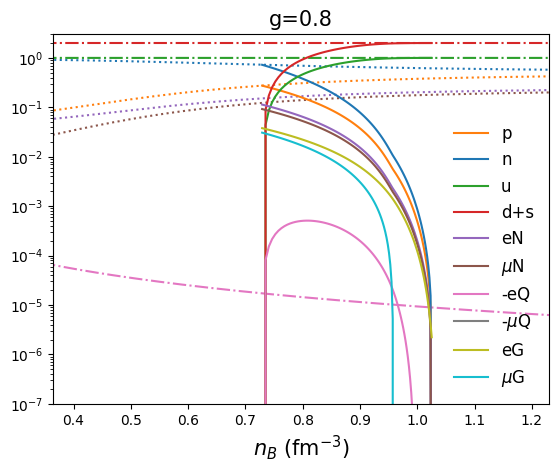

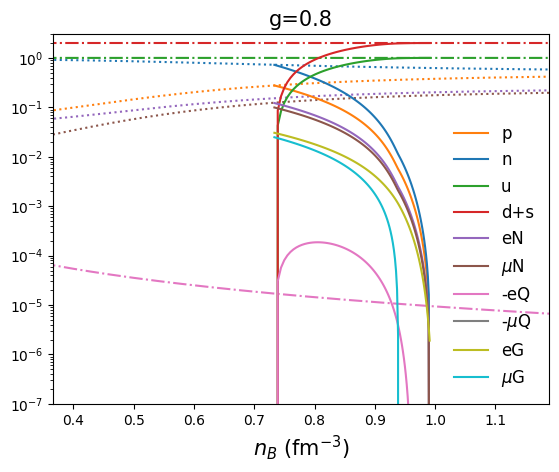

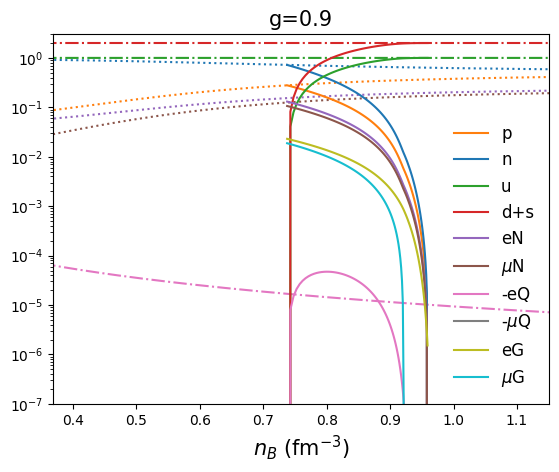

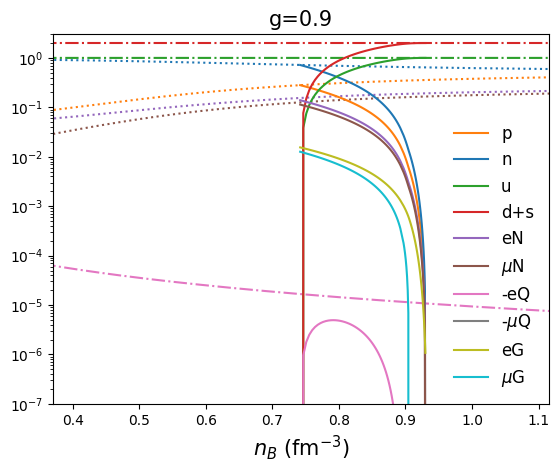

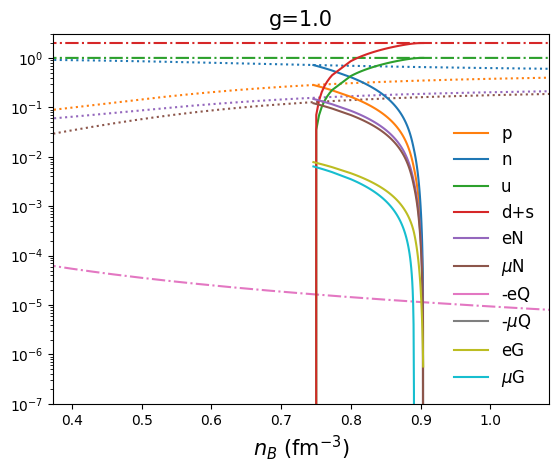

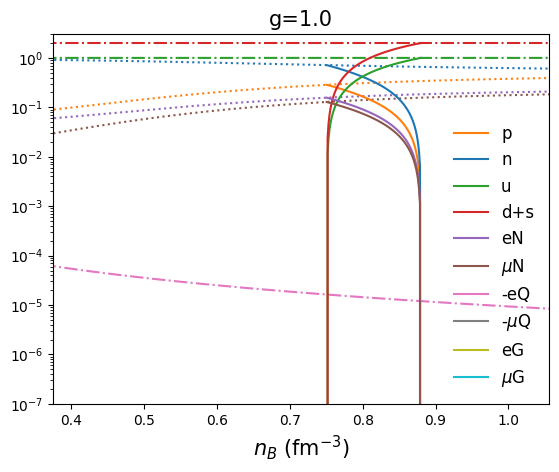

In [4]:
# plot composition for quark-hadron mixture

particle_list=['p','n','u','d+s','eN','$\mu$N','-eQ','-$\mu$Q','eG','$\mu$G']
for data_MIX_i in data_MIX:
    plt.figure()
    plt.plot(data_ZLA[1],data_ZLA[0],color=color_list_10[0],ls=':')
    plt.plot(data_ZLA[1],1-data_ZLA[0],color=color_list_10[1],ls=':')
    plt.plot(data_ZLA[1],1+data_vMIT[0],color=color_list_10[2],ls='-.')
    plt.plot(data_ZLA[1],2-data_vMIT[0],color=color_list_10[3],ls='-.')
    plt.plot(data_ZLA[1],data_ZLA[7]/data_ZLA[1],color=color_list_10[4],ls=':')
    plt.plot(data_ZLA[1],data_ZLA[10]/data_ZLA[1],color=color_list_10[5],ls=':')
    plt.plot(data_ZLA[1],data_vMIT[7]/data_vMIT[1],color=color_list_10[6],ls='-.')
    plt.plot(data_ZLA[1],data_vMIT[10]/data_vMIT[1],color=color_list_10[7],ls='-.')

    g=data_MIX_i[0]
    f=data_MIX_i[1]
    ratio_list=np.array([f,f,1-f,1-f,f*g,f*g,(1-f)*g,(1-f)*g,1-g+0*f,1-g+0*f])
    p_n_u_ds_eN_muN_eQ_muN_eG_muG=np.copy(data_MIX_i[-10:])
    p_n_u_ds_eN_muN_eQ_muN_eG_muG*=ratio_list
    for color_i,p_n_u_ds_eN_muN_eQ_muN_eG_muG_i,label_i in zip(color_list_10,p_n_u_ds_eN_muN_eQ_muN_eG_muG,particle_list):
        if(label_i in ['-eQ','-$\mu$Q']):
            plt.plot(data_MIX_i[2],-p_n_u_ds_eN_muN_eQ_muN_eG_muG_i/data_MIX_i[2],color=color_i,label=label_i)
        else:
            plt.plot(data_MIX_i[2],p_n_u_ds_eN_muN_eQ_muN_eG_muG_i/data_MIX_i[2],color=color_i,label=label_i)
    
    plt.title('g=%.1f'%(1.001*g[0]),fontsize=15)
    plt.legend(frameon=False,fontsize=12)
    plt.yscale('log')
    plt.xlim(0.5*data_MIX_i[2].min(),1.2*data_MIX_i[2].max())
    plt.ylim(1e-7,3)
    plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
    
    #plt.savefig(path+fig_name+'particle_fraction_emu_g%d.pdf'%int(10.01*g[0]),bbox_inches = 'tight',format='pdf')